In [1]:
import numpy as np
from scipy import io
#from scipy.stats import zscore
import matplotlib.pyplot as plt

In [2]:
def zscore(X, axis=0):
    mean_X= np.mean(X,axis=axis)
    std_X = np.std(X, axis=axis) + 1e-10
    X -= np.expand_dims(mean_X, axis)
    X /= np.expand_dims(std_X, axis)

    return X

In [13]:
class DataNode():
    def __init__(self, activity_patterns):
        self.n_neurons=activity_patterns.shape[0]
        self.activity_patterns=activity_patterns
        
class SimuNode():
    def __init__(self,n_neurons):
        self.n_neurons=n_neurons
        
class Synapse():
    def __init__(self,pre_synaptic_node, post_synaptic_node,syn_type='exc'):
        self.pre_synaptic_node=pre_synaptic_node
        self.post_synaptic_node=post_synaptic_node
        self.syn_type=syn_type
        
    def connect(self):
        row_dim=self.pre_synaptic_node.n_neurons
        col_dim=self.post_synaptic_node.n_neurons
        if self.syn_type=='inh':
            self.syn_weights=-np.random.normal(loc=0,size=(col_dim,row_dim))
        elif self.syn_type=='exc':
            self.syn_weights=np.random.normal(loc=0,size=(col_dim,row_dim))
        
        
class CodeRunner():
    def __init__(self,connectivity_graph,node_classification):
        self.connectivity_graph=connectivity_graph
        self.node_classification=node_classification
    
    def gain_function(self,x):
        x[x<0]= 5*np.tanh(x[x<0]/5)
        '''
        if x<0:
            return 5*np.tanh(x/5)
        else:
            return (100-5)*np.tanh(x/(100-5))
        '''
        x[x>=0]=(100-5)*np.tanh(x[x>=0]/(100-5))
        return x
        
    def first_sim(self,data_path):
        activity_patterns=zscore(io.loadmat(data_path)['stim'][0]['resp'][0].T,axis=1)
        print(np.mean(activity_patterns,axis=1))
        print(activity_patterns.shape)
        dat=DataNode(activity_patterns)
        sim=SimuNode(2)
        syn=Synapse(dat,sim)
        syn.connect()
        print(syn.syn_weights.shape)
        synapse_lst=[syn]
        
        rate=np.array([[0,0]])
        h=0.01
        for t in range(0,1000):
            for syn in synapse_lst:
                inpt=syn.syn_weights@activity_patterns[:,t]
                dxdt=(-rate[-1]+self.gain_function(inpt))
                print(dxdt.shape)
                rate=np.vstack((rate,(rate[-1]+h*dxdt)))
                print(inpt)
        print(rate)
        plt.plot(rate)
        
    def second_sim(self,data_path):
        activity_patterns1=io.loadmat(data_path)['stim'][0]['resp'][0].T[:5000,:]
        activity_patterns2=io.loadmat(data_path)['stim'][0]['resp'][0].T[5000:,:]
        node_lst=[]
        for node in self.node_classification:
            if node=='simulated_inh':
                node_lst.append(SimuNode(1))
            if node=='simulated_exc':
                node_lst.append(SimuNode(1))
            if node=='data_inh':
                node_lst.append(DataNode(activity_patterns1))
            if node=='data_exc':
                node_lst.append(DataNode(activity_patterns2))
        synapse_lst=[]
        for pre in range(0,self.connectivity_graph.shape[0]):
            for post in range(0,self.connectivity_graph.shape[1]):
                if self.connectivity_graph[pre,post]==1:
                    if node_classification[pre][-3:]=='exc':
                        syn_type='exc'
                    elif node_classification[pre][-3:]=='inh':
                        syn_type='inh'
                    print(syn_type)
                    syn=Synapse(node_lst[pre],node_lst[post],syn_type)
                    syn.connect()
                    synapse_lst.append(syn)
                    
        for syn in synapse_lst:
            print(syn.syn_weights.shape)  

[-4.5323137e-08 -8.4980876e-09  4.5323137e-08 ... -5.2876992e-08
 -4.5323137e-08 -1.5107712e-08]
(9479, 4040)
(2, 9479)
(2,)
[-5. -5.]
(2,)
[-5.         -4.99721998]
(2,)
[-5.         20.21280139]
(2,)
[-4.99996283 -4.99999999]
(2,)
[-4.90070519 -5.        ]
(2,)
[-4.99914793 -4.9998186 ]
(2,)
[18.30322485 -4.99999999]
(2,)
[-5. -5.]
(2,)
[-5.         -4.99999925]
(2,)
[-4.99999685 44.98308727]
(2,)
[-5.         23.42712625]
(2,)
[-5.        -4.9996144]
(2,)
[15.70179032  5.02335288]
(2,)
[-4.99999999 -5.        ]
(2,)
[-5.         60.86852758]
(2,)
[-5.         76.65576364]
(2,)
[87.94755146  3.41500792]
(2,)
[-5.         68.94615509]
(2,)
[-4.99997831 -5.        ]
(2,)
[11.93525932 14.40278766]
(2,)
[-5. -5.]
(2,)
[-5.         -4.99980672]
(2,)
[10.46636219 23.62607507]
(2,)
[-5.         79.73606561]
(2,)
[-5. -5.]
(2,)
[-5.         55.23748952]
(2,)
[-5. -5.]
(2,)
[-5.         77.01453809]
(2,)
[-5.         16.76629053]
(2,)
[74.91927945 48.96735339]
(2,)
[-4.61880042 66.64051642]
(

(2,)
[70.28207334 29.59490035]
(2,)
[-5.         21.91397049]
(2,)
[-5.         68.37577508]
(2,)
[38.51322045 -2.7124587 ]
(2,)
[-4.99797832 85.74301353]
(2,)
[-4.99999665 -0.69843654]
(2,)
[67.10865938 -5.        ]
(2,)
[-5.        17.3544321]
(2,)
[-4.99991453 -4.99981511]
(2,)
[38.25163015 85.7950914 ]
(2,)
[-5.         35.13488535]
(2,)
[30.73117363 -5.        ]
(2,)
[42.85698673  2.61068849]
(2,)
[-5. -5.]
(2,)
[90.25685333 -4.99999673]
(2,)
[48.72408737 50.78928044]
(2,)
[60.66299273 -5.        ]
(2,)
[60.22248089  0.92689456]
(2,)
[-5.         -4.99776014]
(2,)
[-3.38553938 -4.99993194]
(2,)
[-5. -5.]
(2,)
[-5.         16.69828903]
(2,)
[-4.99561424 -5.        ]
(2,)
[56.26001486 -5.        ]
(2,)
[90.54287496 -4.99571698]
(2,)
[44.77669525 -4.99825172]
(2,)
[78.18117126 -5.        ]
(2,)
[-4.99999573 -4.99997465]
(2,)
[69.37950234 41.35942006]
(2,)
[-5.         74.34903851]
(2,)
[-4.99999995 15.65443801]
(2,)
[-4.30594446 -4.99996419]
(2,)
[89.59428936 11.95196305]
(2,)
[-4.99

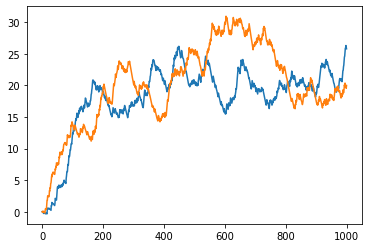

In [5]:
path='/media/maria/DATA1/Documents/old_data/natimg2800_white_M170717_MP034_2017-09-14.mat'
run=CodeRunner(0,0).first_sim(path)

In [14]:
node_classification=['data_exc','data_inh','simulated_exc']
connectivity_graph=np.array([[0,0,1],[0,0,1],[0,0,1]])
run=CodeRunner(connectivity_graph,node_classification).second_sim(path)

exc
inh
exc
(1, 4479)
(1, 5000)
(1, 1)
